<a href="https://colab.research.google.com/github/miguel-kjh/CIFAR10-PyTorch/blob/main/CIFAR10_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as opt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
BATCH_SIZE = 64
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform, )
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([64, 3, 32, 32])


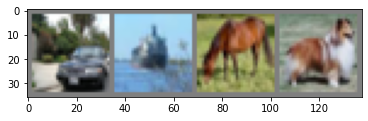

  car  ship horse   dog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
# show images
imshow(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
def train(model, epochs):

  criterion = nn.CrossEntropyLoss()
  optimizer = opt.Adam(model.parameters(), lr = 0.001)
  listLost = []
  listAcc  = []

  for epoch in range(epochs):  # loop over the dataset multiple times

      correct = 0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data[0].to(device), data[1].to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Total correct predictions
          predicted = torch.max(outputs.data, 1)[1] 
          correct += (predicted == labels).sum()
          if i % 50 == 0:
              acc = float(correct*100) / float(BATCH_SIZE*(i+1))
              print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                  epoch, i*len(inputs), len(trainloader.dataset), 100.*i / len(trainloader), loss, acc))
              listLost.append(loss)
              listAcc.append(acc)

  print('Finished Training')
  return (listLost,listAcc)

In [ ]:
def plot(data, title, xlabel, ylabel):
  plt.plot(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

In [ ]:
def prediction(model):
  dataiter = iter(testloader)
  images, labels = dataiter.next()

  # print images
  imshow(torchvision.utils.make_grid(images[0:4]))
  print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
  outputs = model(images.to(device))
  _, predicted = torch.max(outputs, 1)

  print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                for j in range(4)))

In [ ]:
def test(model):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))

In [ ]:
def test_class(model):
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))
  with torch.no_grad():
      for data in testloader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          c = (predicted == labels).squeeze()
          for i in range(4):
              label = labels[i]
              class_correct[label] += c[i].item()
              class_total[label] += 1


  for i in range(10):
      print('Accuracy of %5s : %2d %%' % (
          classes[i], 100 * class_correct[i] / class_total[i]))

## CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.pool  = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(32 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        self.drop = nn.Dropout(p=0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.drop(x)
        x = x.view(-1, 32 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.drop(x)
        x = self.fc3(x)
        return x


net = Net().to(device) # GPU

In [ ]:
loss, acc = train(net, 10)

Epoch : 0 [0/50000 (0%)]	Loss: 0.900876	 Accuracy:67.188%
Epoch : 0 [3200/50000 (6%)]	Loss: 0.755048	 Accuracy:70.619%
Epoch : 0 [6400/50000 (13%)]	Loss: 0.872637	 Accuracy:70.653%
Epoch : 0 [9600/50000 (19%)]	Loss: 0.596474	 Accuracy:71.099%
Epoch : 0 [12800/50000 (26%)]	Loss: 1.061853	 Accuracy:71.199%
Epoch : 0 [16000/50000 (32%)]	Loss: 0.980000	 Accuracy:71.035%
Epoch : 0 [19200/50000 (38%)]	Loss: 0.981915	 Accuracy:70.951%
Epoch : 0 [22400/50000 (45%)]	Loss: 0.770819	 Accuracy:71.060%
Epoch : 0 [25600/50000 (51%)]	Loss: 0.928628	 Accuracy:71.076%
Epoch : 0 [28800/50000 (58%)]	Loss: 0.575168	 Accuracy:71.134%
Epoch : 0 [32000/50000 (64%)]	Loss: 0.854401	 Accuracy:71.289%
Epoch : 0 [35200/50000 (70%)]	Loss: 0.724022	 Accuracy:71.407%
Epoch : 0 [38400/50000 (77%)]	Loss: 0.781958	 Accuracy:71.529%
Epoch : 0 [41600/50000 (83%)]	Loss: 0.846215	 Accuracy:71.431%
Epoch : 0 [44800/50000 (90%)]	Loss: 0.941253	 Accuracy:71.385%
Epoch : 0 [48000/50000 (96%)]	Loss: 0.781908	 Accuracy:71.498%
E

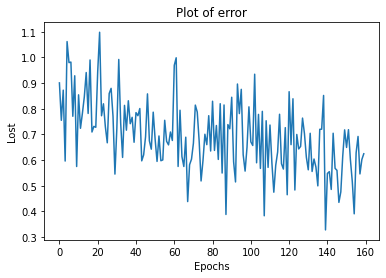

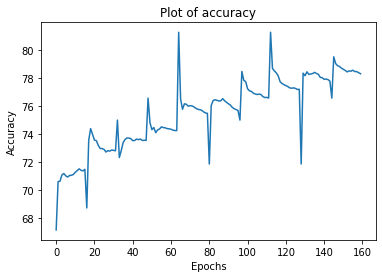

In [ ]:
plot(loss, "Plot of error",  "Epochs", "Lost")
plot(acc, "Plot of accuracy", "Epochs", "Accuracy")

In [ ]:
test(net)

Accuracy of the network on the 10000 test images: 68 %


In [ ]:
test_class(net)

Accuracy of plane : 73 %
Accuracy of   car : 82 %
Accuracy of  bird : 60 %
Accuracy of   cat : 50 %
Accuracy of  deer : 65 %
Accuracy of   dog : 52 %
Accuracy of  frog : 78 %
Accuracy of horse : 73 %
Accuracy of  ship : 74 %
Accuracy of truck : 79 %


# VGG16

In [ ]:
net = torch.hub.load('pytorch/vision:v0.6.0', 'vgg16', pretrained=True).to(device)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [ ]:
loss, acc = train(net, 10)

Epoch : 0 [0/50000 (0%)]	Loss: 17.965185	 Accuracy:0.000%
Epoch : 0 [3200/50000 (6%)]	Loss: 2.127725	 Accuracy:11.887%
Epoch : 0 [6400/50000 (13%)]	Loss: 2.137486	 Accuracy:15.857%
Epoch : 0 [9600/50000 (19%)]	Loss: 1.613185	 Accuracy:18.781%
Epoch : 0 [12800/50000 (26%)]	Loss: 1.737470	 Accuracy:21.720%
Epoch : 0 [16000/50000 (32%)]	Loss: 1.667631	 Accuracy:23.649%
Epoch : 0 [19200/50000 (38%)]	Loss: 1.480437	 Accuracy:25.145%
Epoch : 0 [22400/50000 (45%)]	Loss: 1.690907	 Accuracy:26.585%
Epoch : 0 [25600/50000 (51%)]	Loss: 1.307557	 Accuracy:28.129%
Epoch : 0 [28800/50000 (58%)]	Loss: 1.440407	 Accuracy:29.445%
Epoch : 0 [32000/50000 (64%)]	Loss: 1.460352	 Accuracy:30.723%
Epoch : 0 [35200/50000 (70%)]	Loss: 1.386955	 Accuracy:31.681%
Epoch : 0 [38400/50000 (77%)]	Loss: 1.175732	 Accuracy:32.857%
Epoch : 0 [41600/50000 (83%)]	Loss: 1.380974	 Accuracy:33.948%
Epoch : 0 [44800/50000 (90%)]	Loss: 1.367253	 Accuracy:35.135%
Epoch : 0 [48000/50000 (96%)]	Loss: 1.281467	 Accuracy:36.441%
E

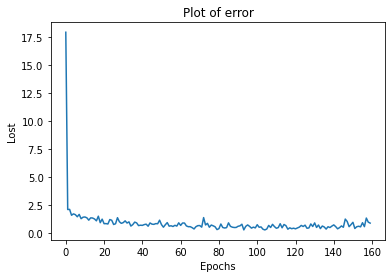

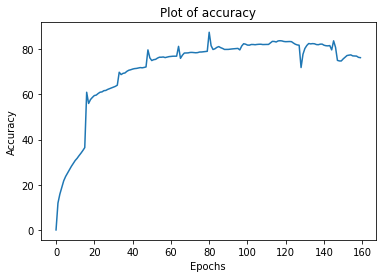

In [ ]:
plot(loss, "Plot of error",  "Epochs", "Lost")
plot(acc, "Plot of accuracy", "Epochs", "Accuracy")

In [ ]:
test(net)

Accuracy of the network on the 10000 test images: 65 %


In [ ]:
test_class(net)

Accuracy of plane : 66 %
Accuracy of   car : 80 %
Accuracy of  bird : 77 %
Accuracy of   cat : 58 %
Accuracy of  deer : 49 %
Accuracy of   dog : 71 %
Accuracy of  frog : 17 %
Accuracy of horse : 70 %
Accuracy of  ship : 74 %
Accuracy of truck : 76 %


# RESNET

In [ ]:
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True).to(device)
net.fc = nn.Linear(512, 10).to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
loss, acc = train(net, 10)

Epoch : 0 [0/50000 (0%)]	Loss: 2.830838	 Accuracy:10.938%
Epoch : 0 [3200/50000 (6%)]	Loss: 1.614226	 Accuracy:42.616%
Epoch : 0 [6400/50000 (13%)]	Loss: 1.354675	 Accuracy:50.031%
Epoch : 0 [9600/50000 (19%)]	Loss: 1.213850	 Accuracy:54.201%
Epoch : 0 [12800/50000 (26%)]	Loss: 0.887481	 Accuracy:57.012%
Epoch : 0 [16000/50000 (32%)]	Loss: 1.269329	 Accuracy:58.721%
Epoch : 0 [19200/50000 (38%)]	Loss: 0.791015	 Accuracy:59.853%
Epoch : 0 [22400/50000 (45%)]	Loss: 0.817452	 Accuracy:61.213%
Epoch : 0 [25600/50000 (51%)]	Loss: 1.171690	 Accuracy:62.449%
Epoch : 0 [28800/50000 (58%)]	Loss: 1.052115	 Accuracy:63.553%
Epoch : 0 [32000/50000 (64%)]	Loss: 0.708242	 Accuracy:64.434%
Epoch : 0 [35200/50000 (70%)]	Loss: 0.973382	 Accuracy:65.095%
Epoch : 0 [38400/50000 (77%)]	Loss: 0.918202	 Accuracy:65.612%
Epoch : 0 [41600/50000 (83%)]	Loss: 1.014946	 Accuracy:66.122%
Epoch : 0 [44800/50000 (90%)]	Loss: 0.642691	 Accuracy:66.639%
Epoch : 0 [48000/50000 (96%)]	Loss: 0.731827	 Accuracy:67.131%
E

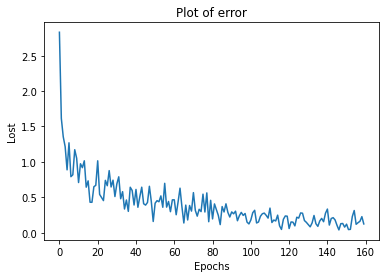

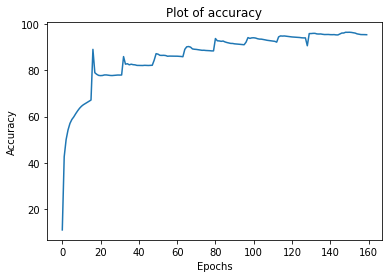

In [ ]:
plot(loss, "Plot of error",  "Epochs", "Lost")
plot(acc, "Plot of accuracy", "Epochs", "Accuracy")

In [ ]:
test(net)
test_class(net)

Accuracy of the network on the 10000 test images: 80 %
Accuracy of plane : 80 %
Accuracy of   car : 92 %
Accuracy of  bird : 68 %
Accuracy of   cat : 58 %
Accuracy of  deer : 85 %
Accuracy of   dog : 72 %
Accuracy of  frog : 87 %
Accuracy of horse : 79 %
Accuracy of  ship : 89 %
Accuracy of truck : 82 %
